## IMPOPRTO LAS LIBRERIAS NECESARIAS

In [1]:
# Librerias de manejo de datos 
import pandas as pd
# from pandasgui import show
from scipy import stats
import numpy as np

# Librerias de visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns


## OBJETIVO:
  - Extraer todos los datos interesantes, para las inmovilarias vacacionales de la ciudad de NY, a petición del cliente

### Cargar datos y mostrarlos

In [2]:
# cargo los datos
city = pd.read_csv("NY_airbnb.csv")
# muestro los datos del csv
city.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Exploración Basica

In [3]:
# Muestro los nombres de las columnas
city.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [4]:
# Descripción estadistica 
city.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
# Información basica del DataFrame (tipo de datos, valores null, uso de memoria)
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
# Información basica de Data set
def summary(city):
    total_values = city.shape[0]
    missing_data = city.isnull().sum()
    missing_percentage = (missing_data / total_values) * 100
    print(f"Dataset has {city.shape[1]} features and {city.shape[0]} rows.")
    summary = pd.DataFrame(index=city.columns)
    summary["Unique"] = city.nunique().values
    summary["Missing"] = city.isnull().sum().values
    summary['Missing %'] = ((missing_data / total_values) * 100).round(2)
    summary["duplicates_count"] = city.apply(lambda x: x.duplicated().sum())
    summary["Types"] = city.dtypes
    
    return summary

# Le asigno una variable a summary para facilitar su manejo
data_basic= summary(city)

# Nombro a la variable para que me la muestre
print(data_basic)

Dataset has 16 features and 48895 rows.
                                Unique  Missing  Missing %  duplicates_count  \
id                               48895        0       0.00                 0   
name                             47905       16       0.03               989   
host_id                          37457        0       0.00             11438   
host_name                        11452       21       0.04             37442   
neighbourhood_group                  5        0       0.00             48890   
neighbourhood                      221        0       0.00             48674   
latitude                         19048        0       0.00             29847   
longitude                        14718        0       0.00             34177   
room_type                            3        0       0.00             48892   
price                              674        0       0.00             48221   
minimum_nights                     109        0       0.00             48786   


### Analisis Univariante "price"

In [7]:
# Estadística descriptiva de price
city["price"].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

C:\Users\Carol\AppData\Local\Temp\ipykernel_3800\4165396062.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(city["price"]);


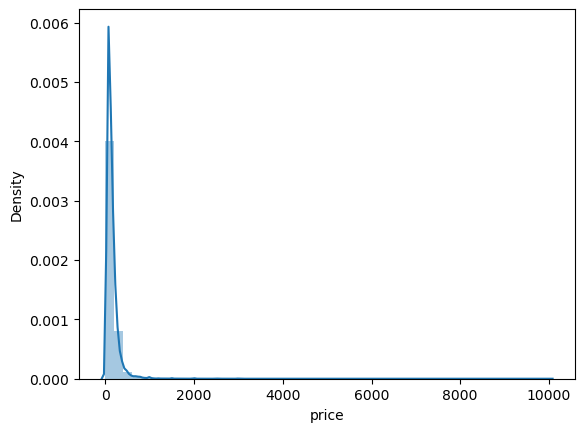

In [8]:
# Grafica de linea
sns.distplot(city["price"]);

Aqui podemos comprobar, que por una parte tenemos la cantidad de propiedadees inmobilarias por unidad de áerea y por otro lugar el precio de las viviendas por área.
- Nos dice que en una área, las casas de la inmobilaria cuestan más que en otras áreas.
- Podemos ver que hay 3 picos altos que son las temporalas mas altas y luego una linea se aplana que son las temporales bajas.
- Tambien que alcanza su punto maximo alrededor de 2.000 de eje X y el 0.006 del eje Y


In [9]:
# Dos medidas estadisticas para la distribucción de los datos.
print("Skewness: %f" % city["price"].skew())
print("Kurtosis: %f" % city["price"].kurt())

Skewness: 19.118939
Kurtosis: 585.672879


Skewness, dice que hay asimetría positiva muy pronunciada y en Kurtosis veo que hay una mayor conceentración de valores, esto indica que tiene que haber valores extremos o inusuales en los datos.

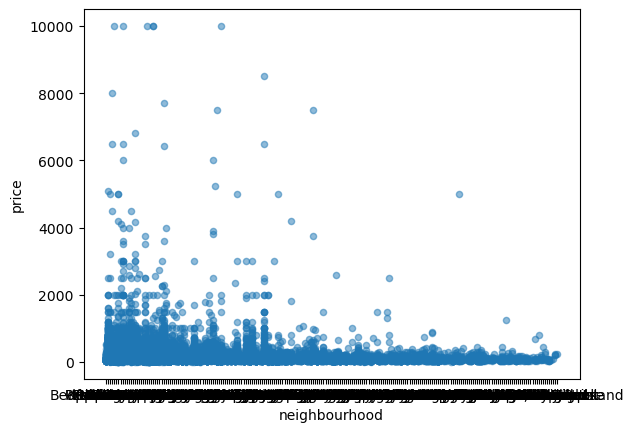

In [10]:
# Diagrama de dispersión neighbourhood/price
local = 'neighbourhood'
data = pd.concat([city['price'], city[local]], axis=1)
data.plot.scatter(x=local, y='price', alpha = 0.5);

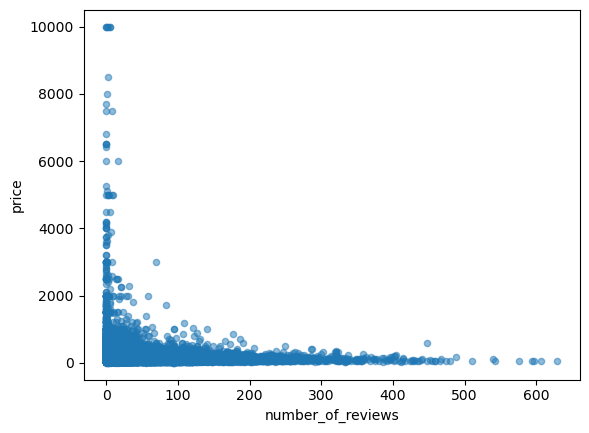

In [11]:
# Diagrama de dispersión number_of_review/price
local = 'number_of_reviews'
data = pd.concat([city['price'], city[local]], axis=1)
data.plot.scatter(x=local, y='price', alpha = 0.5);

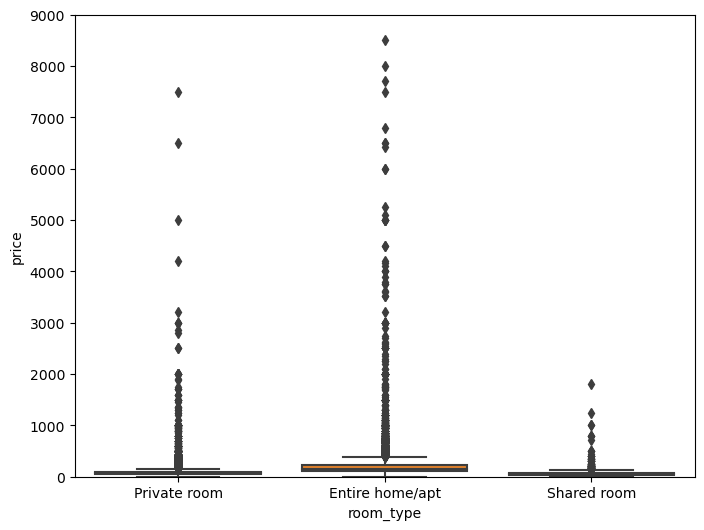

In [12]:
# Convertir 'room_type' en categórica
#city['room_type'] = city['room_type'].astype('category')

# Diagrama de cajas room_type/price
local= 'room_type'
data=pd.concat([city["price"], city[local]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=local, y="price", data=data)
fig.axis(ymin=0, ymax=9000);


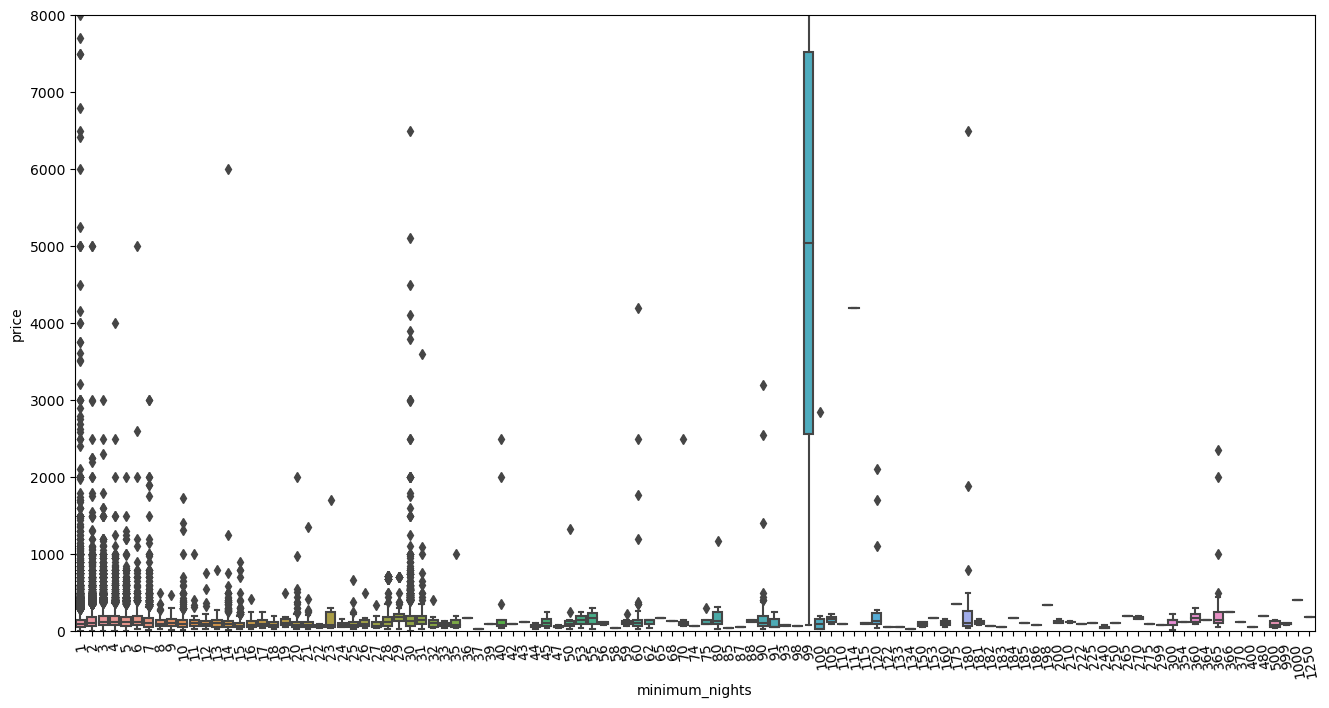

In [13]:
local = 'minimum_nights'
data = pd.concat([city['price'], city[local]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=local, y="price", data=data)
fig.axis(ymin=0, ymax=8000);
plt.xticks(rotation=100);

In [18]:
# Puntuación Z
z = np.abs(stats.zscore(city['price']))
print(z)

0        0.015493
1        0.300974
2        0.011329
3        0.265335
4        0.302811
           ...   
48890    0.344452
48891    0.469373
48892    0.157070
48893    0.406912
48894    0.261171
Name: price, Length: 48895, dtype: float64


### TRATAMIENTO DE OUTLIER

In [14]:
# Veo en que posición estan los Outlier/ de dispresión
print(np.where((city['number_of_reviews']>20) & (city['price']>600)))

print(np.where((city['neighbourhood']=="Manhattan") & (city['price']>600)))


(array([   85,   496,   653,   662,   762,   780,  1201,  1414,  1480,
        1899,  1910,  2040,  2155,  2215,  2236,  2296,  2355,  3055,
        3233,  3240,  3825,  4127,  4292,  4482,  4719,  5351,  5499,
        5801,  5861,  6107,  6277,  6397,  6501,  7017,  7088,  7356,
        7430,  7477,  7846,  8530,  8805,  9035,  9211,  9520, 10212,
       10431, 10520, 10725, 11560, 11913, 12788, 12801, 13724, 14243,
       14392, 14544, 14629, 14951, 15015, 15154, 15833, 15837, 18170,
       18412, 18582, 18975, 19183, 20219, 21241, 21481, 21955, 22854,
       23411, 23624, 24219, 24632, 24993, 25064, 25318, 25413, 26443,
       26451, 26781, 28239, 29994, 30824, 30916, 30965, 31046, 31669,
       31866, 31944, 32151, 34117, 35809, 36536, 37108, 37136, 37678,
       37828, 42047], dtype=int64),)
(array([], dtype=int64),)


In [15]:

#  Veo en que posición estan los Outlier/de diagrama de cajas 
print(np.where(city['room_type']== 'Private Room'))

print(np.where(city["minimum_nights"]>0))
print(np.where(city['price']>0))

(array([], dtype=int64),)
(array([    0,     1,     2, ..., 48892, 48893, 48894], dtype=int64),)
(array([    0,     1,     2, ..., 48892, 48893, 48894], dtype=int64),)


In [19]:
# Veo en que posición estan los Outlier/ de la puntación Z  
print(np.where(z > 3))

(array([  496,   762,   946,  1105,  1414,  1480,  1553,  1862,  1899,
        2018,  2040,  2155,  2215,  2236,  2355,  2386,  2520,  2523,
        2698,  2772,  2896,  3131,  3306,  3333,  3345,  3420,  3537,
        3575,  3594,  3598,  3622,  3636,  3637,  3670,  3684,  3689,
        3695,  3700,  3702,  3720,  3721,  3723,  3727,  3730,  3731,
        3732,  3755,  3758,  3761,  3774,  3782,  3784,  3785,  3788,
        3793,  3804,  3812,  3813,  3817,  4127,  4345,  4376,  4377,
        4482,  4730,  5432,  5499,  5756,  5801,  5839,  5861,  5942,
        5956,  6277,  6333,  6397,  6501,  6511,  6530,  6620,  6715,
        6987,  7088,  7096,  7190,  7477,  7485,  7513,  7541,  7846,
        7982,  8522,  8530,  8727,  8805,  8915,  9035,  9092,  9151,
        9603,  9883, 10333, 10341, 10431, 10520, 11021, 11239, 11264,
       11339, 11369, 11394, 11560, 12329, 12342, 12740, 12800, 12846,
       12878, 13724, 13788, 13930, 14166, 14380, 14385, 14459, 14573,
       14574, 14629

In [16]:
#numeric_data = city.select_dtypes(include=[np.number])
#corrmat = numeric_data.corr()
#numeric_data
#corrmat = city.corr()
#f, ax = plt.subplots(figsize=(12, 9))
#sns.heatmap(corrmat, vmax=.8, square=True);

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,40.64749,-73.97237,149,1,9,0.21,6,365
1,2595,2845,40.75362,-73.98377,225,1,45,0.38,2,355
2,3647,4632,40.80902,-73.94190,150,3,0,NaN,1,365
3,3831,4869,40.68514,-73.95976,89,1,270,4.64,1,194
4,5022,7192,40.79851,-73.94399,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,40.67853,-73.94995,70,2,0,NaN,2,9
48891,36485057,6570630,40.70184,-73.93317,40,4,0,NaN,2,36
48892,36485431,23492952,40.81475,-73.94867,115,10,0,NaN,1,27
48893,36485609,30985759,40.75751,-73.99112,55,1,0,NaN,6,2


In [17]:
corrmat = city.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

ValueError: could not convert string to float: 'Clean & quiet apt home by the park'